In [2]:
import pandas as pd
import glob, os
import shutil as sh
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pathlib import Path
from os.path import splitext
from functools import reduce
from pandas.api.types import is_numeric_dtype
import warnings
from pandas.errors import SettingWithCopyWarning
from matplotlib.font_manager import FontProperties 
from matplotlib import cm
import itertools
from matplotlib import container
from matplotlib import gridspec
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import matplotlib as mpl
from pandas.plotting import table
from statistics import mean
import statistics

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
%%bash

grep -c "^>" shenzhen.fasta


232


In [ ]:
%%bash

for file in $(ls newfasta/*.fasta)
do 
    bbmap.sh in=$file out=$file.bam ref=data/ref.fasta
    samtools sort $file.bam -o $file.bam
    samtools mpileup -f data/ref.fasta $file.bam > $file.pileup
    java -jar VarScan.jar pileup2snp $file.pileup --min-coverage 1 --min-reads2 1 > $file.vcf
done

java -ea -Xmx23465m -Xms23465m -cp /usr/share/java/bbmap.jar align2.BBMap build=1 overwrite=true fastareadlen=500 in=newfasta/10_huanglonghui_0803_Consensus_NC_063383.1.fasta out=newfasta/10_huanglonghui_0803_Consensus_NC_063383.1.fasta.bam ref=data/ref.fasta
Executing align2.BBMap [build=1, overwrite=true, fastareadlen=500, in=newfasta/10_huanglonghui_0803_Consensus_NC_063383.1.fasta, out=newfasta/10_huanglonghui_0803_Consensus_NC_063383.1.fasta.bam, ref=data/ref.fasta]
Version 38.95

Retaining first best site only for ambiguous mappings.
NOTE:	Deleting contents of ref/genome/1 because reference is specified and overwrite=true
NOTE:	Deleting contents of ref/index/1 because reference is specified and overwrite=true
Writing reference.
Executing dna.FastaToChromArrays2 [data/ref.fasta, 1, writeinthread=false, genscaffoldinfo=true, retain, waitforwriting=false, gz=true, maxlen=536670912, writechroms=true, minscaf=1, midpad=300, startpad=8000, stoppad=8000, nodisk=false]

Set genScaffoldIn

Error while terminating subprocess (pid=29726): 


Analyzed Index:   	2.264 seconds.
Found samtools 1.21
Started output stream:	0.048 seconds.
Cleared Memory:    	0.150 seconds.
Processing reads in single-ended mode.
Started read stream.
Started 11 mapping threads.
Detecting finished threads: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10

   ------------------   Results   ------------------   

Genome:                	1
Key Length:            	13
Max Indel:             	16000
Minimum Score Ratio:  	0.56
Mapping Mode:         	normal
Reads Used:           	395	(197199 bases)

Mapping:          	0.707 seconds.
Reads/sec:       	558.68
kBases/sec:      	278.92


Read 1 data:      	pct reads	num reads 	pct bases	   num bases

mapped:          	 99.4937% 	      393 	 99.6455% 	      196500
unambiguous:     	 93.6709% 	      370 	 93.8139% 	      185000
ambiguous:       	  5.8228% 	       23 	  5.8317% 	       11500
low-Q discards:  	  0.5063% 	        2 	  0.3545% 	         699

perfect best site:	 78.2278% 	      309 	 78.3473% 	      154500
semiperfec

In [ ]:
source_folder = "/mnt/d/fig_3/newfasta"
destination_folder = "/mnt/d/fig_3/newfasta"

bam_folder = os.path.join(destination_folder, "bams")
pileup_folder = os.path.join(destination_folder, "pileups")
vcf_folder = os.path.join(destination_folder, "VCFs")

os.makedirs(bam_folder, exist_ok=True)
os.makedirs(pileup_folder, exist_ok=True)
os.makedirs(vcf_folder, exist_ok=True)

for file_name in os.listdir(source_folder):
    file_path = os.path.join(source_folder, file_name)
    
    if file_name.endswith(".fasta.bam"):
        shutil.move(file_path, bam_folder)
    elif file_name.endswith(".fasta.pileup"):
        shutil.move(file_path, pileup_folder)
    elif file_name.endswith(".fasta.vcf"):
        shutil.move(file_path, vcf_folder)

print("Done!")


In [ ]:
def load_dataframes(path):
    filelist = [os.path.splitext(file)[0] for file in os.listdir(path) if file.endswith('.vcf')]
    list_of_DFs = []
    for file in filelist:
        DF = path + '/' + file + '.vcf'
        file = pd.read_csv(DF, header=0, sep='\t', low_memory=False)
        file['sample'] = DF
        list_of_DFs.append(file)
    print(filelist)
    return(list_of_DFs)

In [ ]:

list_of_Shenzhen_DFs = load_dataframes('fasta/VCFs')


['10_huanglonghui_0803_Consensus_NC_063383.1.fasta', '1_shaoshilong_0803_Consensus_NC_063383.1.fasta', '2_xuxueliang_0803_Consensus_NC_063383.1.fasta', '3_likonghuan_0803_Consensus_NC_063383.1.fasta', '4_dengzhongqiu_0803_Consensus_NC_063383.1.fasta', '5_chenchanghang_0803_Consensus_NC_063383.1.fasta', '6_qiujinglong_0803_Consensus_NC_063383.1.fasta', '7_dengqihua_0803_Consensus_NC_063383.1.fasta', '8_huangsongwei_0803_Consensus_NC_063383.1.fasta', '9_yantao_0803_Consensus_NC_063383.1.fasta', 'A10_Mpxv-10_0816_Consensus_NC_063383.1.fasta', 'A10_zhouwei_1112_Consensus_NC_063383.1.fasta', 'A11_lisicong_1112_Consensus_NC_063383.1.fasta', 'A11_Mpxv-11_0816_Consensus_NC_063383.1.fasta', 'A12_Mpxv-12_0816_Consensus_NC_063383.1.fasta', 'A12_zhenghuabing_1112_Consensus_NC_063383.1.fasta', 'A1_linxiaobiao_1112_Consensus_NC_063383.1.fasta', 'A1_Mpxv-1_0816_Consensus_NC_063383.1.fasta', 'A2_Mpxv-2_0816_Consensus_NC_063383.1.fasta', 'A2_yangsien_1112_Consensus_NC_063383.1.fasta', 'A3_lichunping_11

In [ ]:
def clean_dataframes(path, list_of_DFs):
    if not os.path.exists(path + '/cleaned'):
        os.makedirs(path + '/cleaned')
    for DF in list_of_DFs:
        DF = DF[['sample', 'Position', 'Ref', 'Cons']]
        DF['sample'] = DF['sample'].map(lambda x: x.lstrip('fasta/VCFs/'))
        DF['sample'] = DF['sample'].map(lambda x: x.rstrip('.fasta.vcf'))
        DF['sample'] = DF['sample'].map(lambda x: x.lstrip('SA_'))
        sample = DF['sample'].values[0]
        DF.to_csv(path + 'cleaned/' + sample + '-cleaned.csv', sep='\t')

In [ ]:
clean_dataframes('fasta/', list_of_Shenzhen_DFs) 

In [ ]:
path, dirs, files = next(os.walk("fasta/cleaned"))
Shenzhen_len = len(files)

print(Shenzhen_len) # 197

197


In [ ]:
output_txt = "cleaned_files.txt"
with open(output_txt, "w") as f:
    for file in files:
        f.write(file + "\n")

print(f"save {output_txt}")

In [ ]:
Shenzhen_all = pd.concat([pd.read_csv(f, sep='\t') for f in glob.glob("fasta/cleaned/*.csv")], ignore_index=True)
Shenzhen_all = Shenzhen_all[['sample', 'Position']]

In [ ]:
MKEannots = pd.concat([pd.read_csv(f, sep='\t') for f in glob.glob("fasta/cleaned/*.csv")], ignore_index=True)
MKEannots = MKEannots.drop_duplicates(subset='Position', keep="first")
MKEannots = MKEannots[['Cons', 'Position', 'Ref', 'sample']]

In [ ]:
Shenzhen_unique = Shenzhen_all.drop_duplicates(subset='Position', keep="first")

print("Total # of Shenzhen SNVs:", len(Shenzhen_all))

print("# of unique Shenzhen SNVs:", len(Shenzhen_unique)) 

Total # of Shenzhen SNVs: 18507
# of unique Shenzhen SNVs: 426


In [11]:
metadata = pd.read_csv('data/snp.csv')

metadata = metadata[['Position', 'Annotations']]

metadata_dict = dict(zip(metadata.Position, metadata.Annotations))

In [ ]:
temp = Shenzhen_all.groupby('Position')['sample'].apply(','.join)

Shenzhen_group = pd.DataFrame(temp)

Shenzhen_group = Shenzhen_group['sample'].str.split(pat=",", expand=True)

Shenzhen_group['Sample_count'] = Shenzhen_group.apply(lambda x: x.count(), axis=1)

Shenzhen_group = Shenzhen_group[['Sample_count']]

Shenzhen_group = Shenzhen_group.reset_index()

Shenzhen_group['Annotation']= Shenzhen_group['Position'].map(metadata_dict)

In [13]:
print(Shenzhen_group)

     Position  Sample_count     Annotation
0         804             5     Synonymous
1        1262           197     Synonymous
2        2591           194  Nonsynonymous
3        2732             1  Nonsynonymous
4        3079             1  Nonsynonymous
..        ...           ...            ...
421    189956             1  Nonsynonymous
422    190075             1  Nonsynonymous
423    190575             1     Synonymous
424    190736           192  Nonsynonymous
425    190872             1     Synonymous

[426 rows x 3 columns]


In [ ]:
Shenzhen_group_syn_temp = Shenzhen_group.loc[Shenzhen_group.Annotation=='Synonymous']

Shenzhen_group_intergenic = Shenzhen_group.loc[Shenzhen_group.Annotation=='intergenic']

Shenzhen_frames_syn = [Shenzhen_group_syn_temp, Shenzhen_group_intergenic]

Shenzhen_group_syn = pd.concat(Shenzhen_frames_syn)

Shenzhen_group_syn = Shenzhen_group_syn.sort_values('Position')

Shenzhen_group_nonsyn = Shenzhen_group.loc[Shenzhen_group.Annotation=='Nonsynonymous']

Shenzhen_group_nonsyn = Shenzhen_group_nonsyn.sort_values('Position')

In [15]:
Shenzhen_syn = len(Shenzhen_group_syn)
Shenzhen_nonsyn = len(Shenzhen_group_nonsyn)


print(Shenzhen_nonsyn)

Shenzhen_ratio = Shenzhen_nonsyn / Shenzhen_syn


print("# of synonymous SNVs in Shenzhen is ", len(Shenzhen_group_syn))
print("# of nonsynonymous SNVs in Shenzhen is ", len(Shenzhen_group_nonsyn))


print("ratio of nonsyn/syn in Shenzhen is ", Shenzhen_ratio)


224
# of synonymous SNVs in Shenzhen is  149
# of nonsynonymous SNVs in Shenzhen is  224
ratio of nonsyn/syn in Shenzhen is  1.5033557046979866


In [ ]:
temp3 = Shenzhen_all.groupby('sample').Position.apply(lambda x: ','.join(map(str, x)))

Shenzhen_group = pd.DataFrame(temp3)

Shenzhen_group['SNV_count'] = Shenzhen_group.Position.str.count(',') + 1

Shenzhne_group = Shenzhen_group[['SNV_count']]


print("average interpatient SNV distance for Shenzhen is ", Shenzhen_group['SNV_count'].mean())
print("std interpatient SNV distance for Shenzhen is ", Shenzhen_group['SNV_count'].std())


average interpatient SNV distance for Shenzhen is  93.94416243654823
std interpatient SNV distance for Shenzhen is  5.408037190995827


In [ ]:
Shenzhen_group = pd.DataFrame(temp3)
Shenzhen_group['SNV_count'] = Shenzhen_group.Position.str.count(',') + 1
Shenzhen_group = Shenzhen_group[['SNV_count']]
median_snv = Shenzhen_group['SNV_count'].median()
print("median interpatient SNV distance for Shenzhen is ", median_snv)
def bootstrap_ci(data, num_bootstraps=10000, ci=95):
    bootstraps = np.random.choice(data, size=(num_bootstraps, len(data)), replace=True)
    bootstrap_medians = np.median(bootstraps, axis=1)
    lower = np.percentile(bootstrap_medians, (100 - ci) / 2)
    upper = np.percentile(bootstrap_medians, 100 - (100 - ci) / 2)
    return lower, upper
snv_data = Shenzhen_group['SNV_count'].values
lower_ci, upper_ci = bootstrap_ci(snv_data)
print("95% CRI for interpatient SNV distance in Shenzhen is [", lower_ci, ", ", upper_ci, "]")
print("All interpatient SNV distances for Shenzhen:")
print(Shenzhen_group['SNV_count'].tolist())

median interpatient SNV distance for Shenzhen is  93.0
95% CRI for interpatient SNV distance in Shenzhen is [ 93.0 ,  94.0 ]
All interpatient SNV distances for Shenzhen:
[100, 94, 94, 88, 94, 102, 97, 98, 91, 99, 93, 96, 94, 98, 93, 93, 91, 94, 92, 98, 94, 93, 88, 91, 94, 98, 93, 97, 86, 88, 59, 99, 93, 92, 98, 104, 91, 95, 101, 94, 93, 99, 92, 89, 93, 96, 93, 98, 91, 97, 95, 98, 87, 76, 89, 92, 104, 102, 91, 94, 102, 91, 95, 99, 91, 103, 95, 100, 94, 97, 92, 99, 93, 99, 96, 103, 96, 100, 103, 91, 93, 98, 93, 94, 93, 96, 88, 94, 94, 88, 89, 97, 96, 88, 97, 88, 88, 94, 104, 91, 97, 95, 100, 77, 95, 96, 89, 99, 91, 94, 102, 95, 92, 95, 94, 94, 93, 95, 92, 99, 95, 98, 93, 96, 104, 102, 94, 93, 103, 100, 95, 104, 100, 99, 105, 99, 95, 100, 99, 85, 93, 93, 93, 90, 90, 91, 89, 92, 103, 94, 90, 90, 90, 94, 93, 93, 90, 109, 92, 93, 93, 91, 92, 91, 92, 91, 94, 90, 89, 89, 94, 87, 90, 91, 99, 93, 93, 93, 89, 92, 93, 103, 93, 92, 91, 94, 89, 90, 90, 90, 93, 93, 92, 85, 91, 85, 87]


median interpatient SNV distance for Shenzhen is  93.0
95% CRI for interpatient SNV distance in Shenzhen is [ 93.0 ,  94.0 ]
All interpatient SNV distances for Shenzhen:
[100, 94, 94, 88, 94, 102, 97, 98, 91, 99, 93, 96, 94, 98, 93, 93, 91, 94, 92, 98, 94, 93, 88, 91, 94, 98, 93, 97, 86, 88, 59, 99, 93, 92, 98, 104, 91, 95, 101, 94, 93, 99, 92, 89, 93, 96, 93, 98, 91, 97, 95, 98, 87, 76, 89, 92, 104, 102, 91, 94, 102, 91, 95, 99, 91, 103, 95, 100, 94, 97, 92, 99, 93, 99, 96, 103, 96, 100, 103, 91, 93, 98, 93, 94, 93, 96, 88, 94, 94, 88, 89, 97, 96, 88, 97, 88, 88, 94, 104, 91, 97, 95, 100, 77, 95, 96, 89, 99, 91, 94, 102, 95, 92, 95, 94, 94, 93, 95, 92, 99, 95, 98, 93, 96, 104, 102, 94, 93, 103, 100, 95, 104, 100, 99, 105, 99, 95, 100, 99, 85, 93, 93, 93, 90, 90, 91, 89, 92, 103, 94, 90, 90, 90, 94, 93, 93, 90, 109, 92, 93, 93, 91, 92, 91, 92, 91, 94, 90, 89, 89, 94, 87, 90, 91, 99, 93, 93, 93, 89, 92, 93, 103, 93, 92, 91, 94, 89, 90, 90, 90, 93, 93, 92, 85, 91, 85, 87]


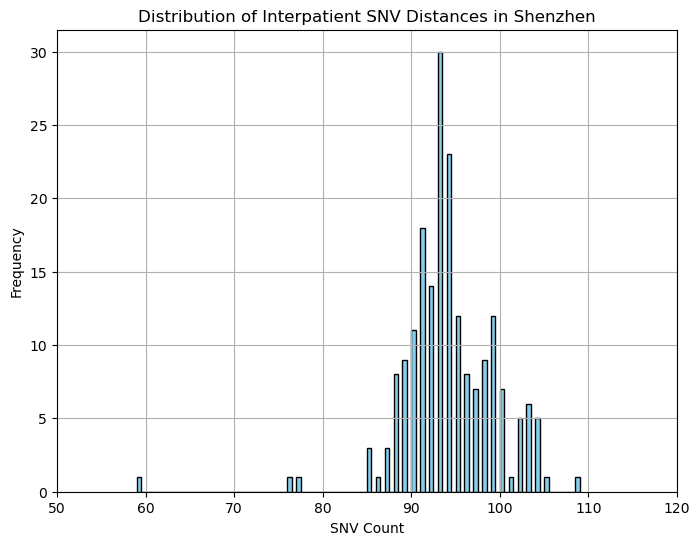

In [ ]:
Shenzhen_group = pd.DataFrame(temp3)
Shenzhen_group['SNV_count'] = Shenzhen_group.Position.str.count(',') + 1
Shenzhen_group = Shenzhen_group[['SNV_count']]


median_snv = Shenzhen_group['SNV_count'].median()
print("median interpatient SNV distance for Shenzhen is ", median_snv)

def bootstrap_ci(data, num_bootstraps=100000, ci=95):
    bootstraps = np.random.choice(data, size=(num_bootstraps, len(data)), replace=True)
    bootstrap_medians = np.median(bootstraps, axis=1)
    lower = np.percentile(bootstrap_medians, (100 - ci) / 2)
    upper = np.percentile(bootstrap_medians, 100 - (100 - ci) / 2)
    return lower, upper

snv_data = Shenzhen_group['SNV_count'].values
lower_ci, upper_ci = bootstrap_ci(snv_data)
print("95% CRI for interpatient SNV distance in Shenzhen is [", lower_ci, ", ", upper_ci, "]")


print("All interpatient SNV distances for Shenzhen:")
print(Shenzhen_group['SNV_count'].tolist())


import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(Shenzhen_group['SNV_count'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Interpatient SNV Distances in Shenzhen')
plt.xlabel('SNV Count')
plt.ylabel('Frequency')

min_x = 50 
max_x = 120  
plt.xlim(min_x, max_x)
plt.grid(True)
plt.show()


/tmp/ipykernel_615346/1703095710.py:57: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


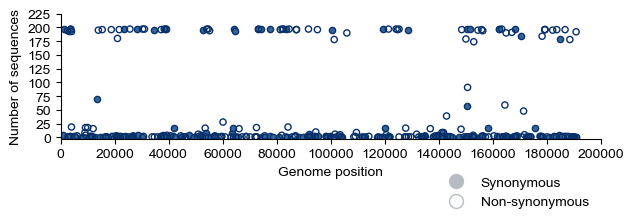

In [ ]:
fig = plt.figure(figsize=(12,8), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(4, 12)

ax1 = fig.add_subplot(gs[1,0:6])

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)

ax1.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax1.tick_params(axis = 'both', which = 'minor', labelsize = 10)

ax1.set_xlabel('Genome position', fontname='Arial', fontsize=10)
ax1.set_ylabel('Number of sequences', fontname='Arial', fontsize=10)
ax1.set_facecolor('white')

for tick in ax1.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax1.get_yticklabels():
    tick.set_fontname("Arial")

ax1.set_ylim(-2,102)
ax1.set_yticks(range(0, 227, 25))
ax1.set_xlim(-2,200000)
ax1.set_xticks(range(0,200002,20000))

ax1.scatter(x=Shenzhen_group_syn['Position'], y=Shenzhen_group_syn['Sample_count'], marker='o', s=20, facecolors='#36659e', edgecolors='#08306b', zorder=1, label='Synonymous')
ax1.scatter(x=Shenzhen_group_nonsyn['Position'], y=Shenzhen_group_nonsyn['Sample_count'], marker='o', s=20, facecolors='none', edgecolors='#08306b', zorder=1, label='Nonsynonymous')

custom_syn = mlines.Line2D([], [], color='#b6bcc1', marker='o', markersize=10, linestyle='None', markerfacecolor='#b6bcc1', label='Synonymous')
custom_nonsyn = mlines.Line2D([], [], color='#b6bcc1', marker='o', markersize=10, linestyle='None', markerfacecolor='none', label='Non-synonymous')

ax1.legend(handles=[custom_syn, custom_nonsyn], loc='upper right', bbox_to_anchor=(1, -0.2), fontsize=10, frameon=False)

fig.savefig("result/fig3_A.pdf", bbox_inches='tight', dpi=3000)

fig.tight_layout()
fig.savefig("result/fig3_A.pdf", bbox_inches='tight', dpi=3000)
fig.savefig("result/fig3_A.svg", bbox_inches='tight')

fig.tight_layout()
fig.show()

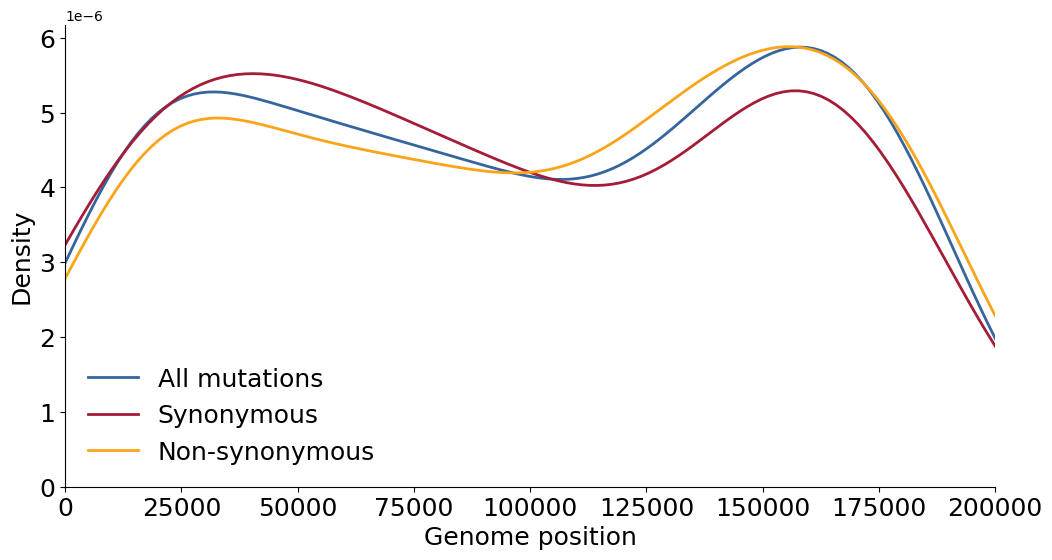

In [ ]:
def plot_mutation_distribution(syn_data, nonsyn_data):
    syn_positions = syn_data['Position'].values
    nonsyn_positions = nonsyn_data['Position'].values
    all_positions = np.concatenate([syn_positions, nonsyn_positions])
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    sns.kdeplot(data=all_positions, ax=ax, color='#36659e', label='All mutations', linewidth=2)
    sns.kdeplot(data=syn_positions, ax=ax, color='#a51c36', label='Synonymous', linewidth=2)
    sns.kdeplot(data=nonsyn_positions, ax=ax, color='#faa419', label='Non-synonymous', linewidth=2)
    
    ax.set_xlabel('Genome position', fontsize=18)
    ax.set_ylabel('Density', fontsize=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_xlim(0, 200000)
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    
    ax.legend(frameon=False, fontsize=18)
    
    plt.savefig('/mnt/d/hanjia/2.10/fig_3/sup.pdf', bbox_inches='tight')
    plt.savefig('/mnt/d/hanjia/2.10/fig_3/sup.svg', bbox_inches='tight')
    
    plt.show()


plot_mutation_distribution(Shenzhen_group_syn, Shenzhen_group_nonsyn)


/tmp/ipykernel_650582/3216755545.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


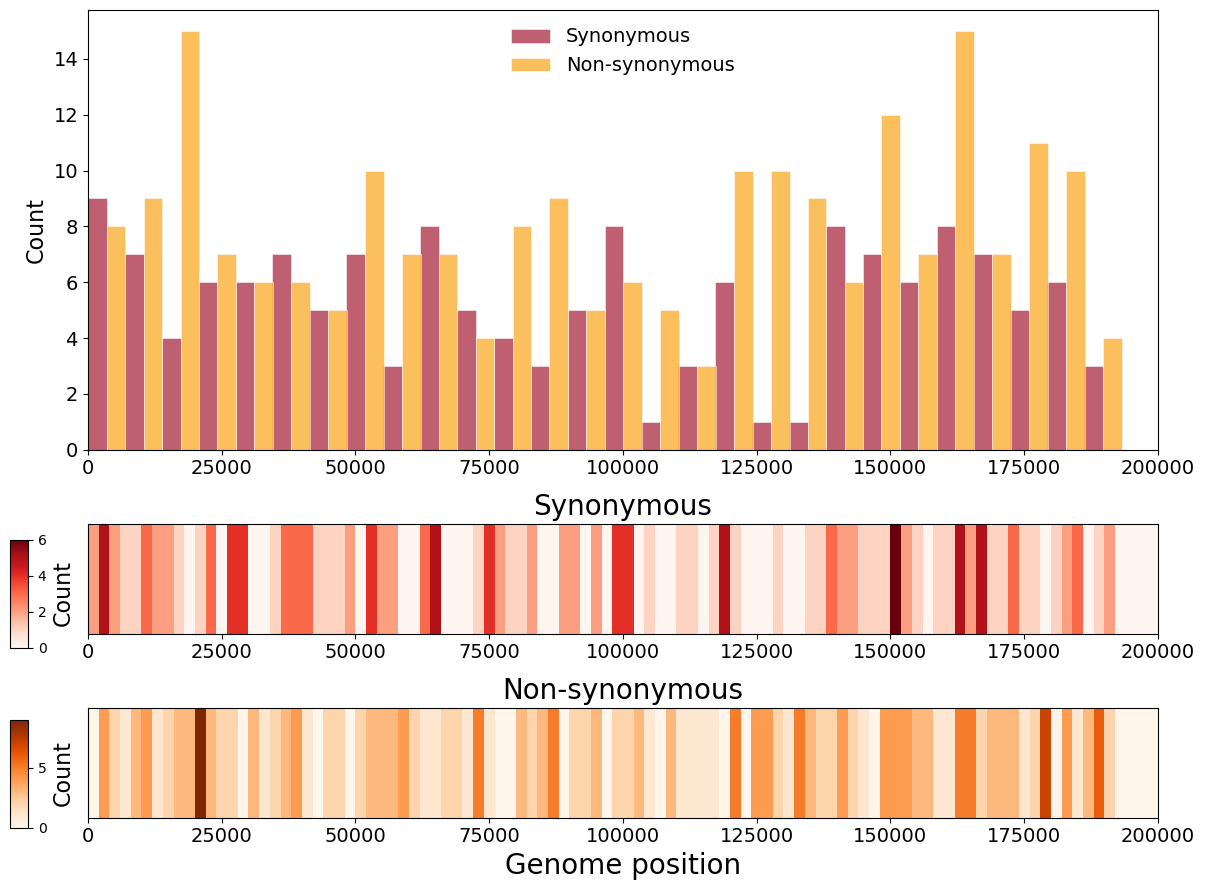

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import seaborn as sns
from scipy.ndimage import gaussian_filter1d

def plot_mutation_distribution(syn_data, nonsyn_data):
    syn_positions = syn_data['Position'].values
    nonsyn_positions = nonsyn_data['Position'].values
    
    fig, axes = plt.subplots(
        3, 1, figsize=(12, 9), 
        gridspec_kw={'height_ratios': [4, 1, 1]}
    )
    
    ax1 = axes[0]
    
    bins = np.linspace(0, 200000, 30)
    shift = 3500
    bins_offset = bins + shift
    
    ax1.hist(syn_positions, bins=bins, alpha=0.7, color='#a51c36', 
             label='Synonymous', width=3500, edgecolor='white', linewidth=0.5)
    ax1.hist(nonsyn_positions, bins=bins_offset, alpha=0.7, color='#faa419', 
             label='Non-synonymous', width=3500, edgecolor='white', linewidth=0.5)
    
    ax1.set_ylabel('Count', fontsize=16)
    ax1.set_xlim(0, 200000)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.tick_params(axis='y', labelsize=14)
    ax1.legend(frameon=False, fontsize=14)
    
    ax2 = axes[1]
    
    syn_hist, syn_bins = np.histogram(syn_positions, bins=100, range=(0, 200000))
    syn_heatmap_data = syn_hist.reshape(1, -1)
    
    im1 = ax2.imshow(syn_heatmap_data, cmap='Reds', aspect='auto', 
                     extent=[0, 200000, 0, 1])
    ax2.set_ylabel('')
    ax2.set_title('Synonymous', fontsize=20)
    ax2.set_yticks([])
    ax2.tick_params(axis='x', labelsize=14)
    
    ax3 = axes[2]
    
    nonsyn_hist, nonsyn_bins = np.histogram(nonsyn_positions, bins=100, range=(0, 200000))
    nonsyn_heatmap_data = nonsyn_hist.reshape(1, -1)
    
    im2 = ax3.imshow(nonsyn_heatmap_data, cmap='Oranges', aspect='auto', 
                     extent=[0, 200000, 0, 1])
    ax3.set_xlabel('Genome position', fontsize=20)
    ax3.set_ylabel('')
    ax3.set_title('Non-synonymous', fontsize=20)
    ax3.set_yticks([])
    ax3.tick_params(axis='x', labelsize=14)
    
    cbar_ax1 = fig.add_axes([0, 0.275, 0.015, 0.12])
    cbar1 = plt.colorbar(im1, cax=cbar_ax1)
    cbar1.set_label('Count', fontsize=16)
    
    cbar_ax2 = fig.add_axes([0, 0.075, 0.015, 0.12])
    cbar2 = plt.colorbar(im2, cax=cbar_ax2)
    cbar2.set_label('Count', fontsize=16)
    
    plt.tight_layout()
    
    plt.savefig('/mnt/d/hanjia/2.10/fig_3/sup.pdf', bbox_inches='tight', dpi=300)
    plt.savefig('/mnt/d/hanjia/2.10/fig_3/sup.svg', bbox_inches='tight')
    plt.savefig('/mnt/d/hanjia/2.10/fig_3/sup.png', bbox_inches='tight', dpi=300)
    
    plt.show()

plot_mutation_distribution(Shenzhen_group_syn, Shenzhen_group_nonsyn)


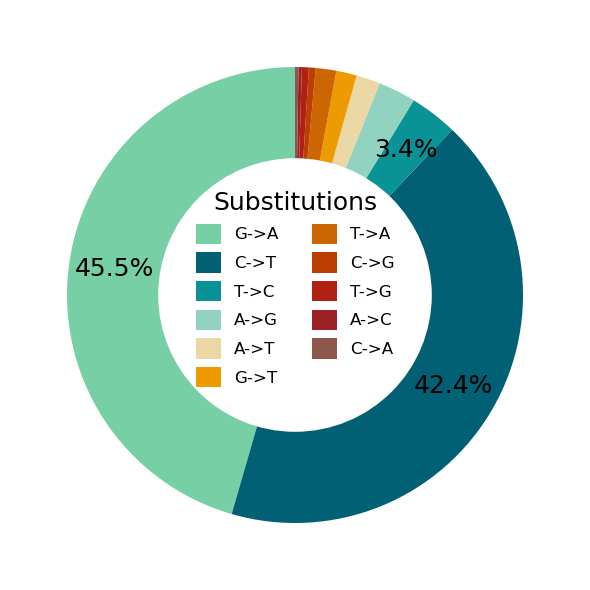

In [3]:
def read_mutation_data(file_path):
    mutation_counts = {}
    with open(file_path, "r") as file:
        for line in file:
            line = line.strip()
            if line and ":" in line:
                parts = line.split(":", 1)
                if len(parts) == 2:
                    mutation = parts[0].strip()
                    count = parts[1].strip()
                    if count and count.isdigit():
                        mutation_counts[mutation] = int(count)
    return mutation_counts

txt_file = "data/mutation_counts_unique.txt"
mutation_counts = read_mutation_data(txt_file)

sorted_mutations = sorted(mutation_counts.items(), key=lambda x: x[1], reverse=True)
labels, sizes = zip(*sorted_mutations)

colors = [
    "#77cfa5", "#016074", "#099396", "#91d2c0",
    "#ebd7a5", "#ee9b01", "#cc6602", "#bc3e03",
    "#b02013", "#9d2227", "#8c564b"
]

display_top_n = 3

def autopct_format(pct, all_values):
    total = sum(all_values)
    absolute = int(round(pct * total / 100.0))
    if absolute in sorted(sizes, reverse=True)[:display_top_n]:
        return f"{pct:.1f}%"
    else:
        return ""

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    sizes, labels=None, autopct=lambda pct: autopct_format(pct, sizes),
    startangle=90, colors=colors, wedgeprops={'edgecolor': 'none'}, pctdistance=0.8
)

for text in texts + autotexts:
    text.set_fontsize(18)

centre_circle = plt.Circle((0, 0), 0.6, fc='white')
plt.gca().add_artist(centre_circle)

plt.legend(
    wedges, labels, title="Substitutions",
    loc="center", bbox_to_anchor=(0.25, 0.01, 0.5, 1),
    fontsize=12, title_fontsize=18, ncol=2, frameon=False,
    handlelength=1.5, handleheight=1.5
)

plt.tight_layout()
plt.savefig('fig/fig_B_1.pdf')
plt.savefig('fig/fig_B_1.svg')
plt.show()


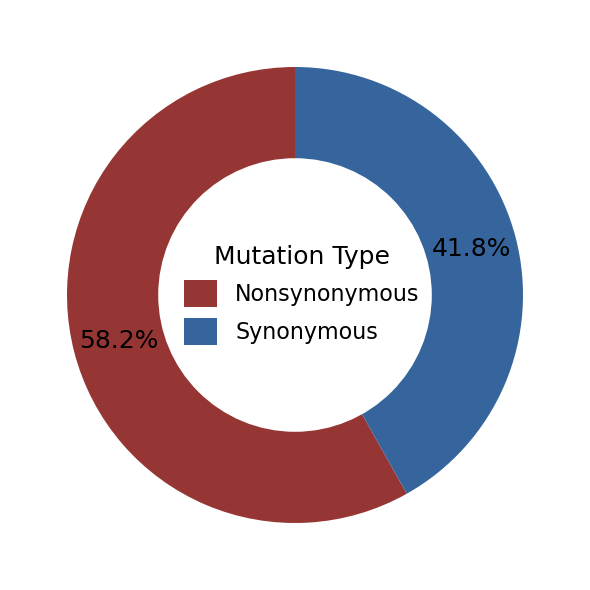

In [4]:
df = pd.read_csv('data/snp.csv')

mutation_counts = df['Annotations'].value_counts()

colors = ['#963634', '#36659e']

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    mutation_counts, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors, 
    wedgeprops={'edgecolor': 'none'}, 
    pctdistance=0.8,
    labels=None
)

for text in texts + autotexts:
    text.set_fontsize(18)

centre_circle = plt.Circle((0, 0), 0.6, fc='white')
plt.gca().add_artist(centre_circle)

plt.legend(
    wedges, mutation_counts.index, title="Mutation Type",
    loc="center left", bbox_to_anchor=(0.27, 0.5),
    fontsize=16, title_fontsize=18, frameon=False,
    handlelength=1.5, handleheight=1.5
)

plt.tight_layout()
plt.savefig('fig/fig_B_2.pdf')
plt.savefig('fig/fig_B_2.svg')
plt.show()